In [1]:
from migdalcalc import migdalcalc as mc
import matplotlib.pyplot as plt
import numpy as np
from migdalcalc.migdal import quench

In [2]:
Si_migdal = mc.migdalcalc(target="Si-28")

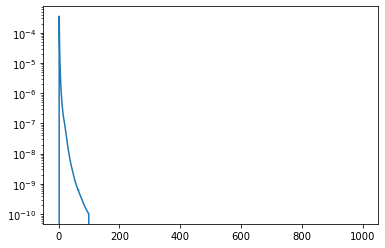

In [7]:
angle = 13 #13 deg
c = np.cos(angle*np.pi/180)
En = 2000 #2 keV
YL = lambda E: quench.Lindhard_Factor(E, 14, 28)
Si_ionization_spectrum = Si_migdal.dR_dEion(c, En, YL, "elf")

E_ion_range = np.geomspace(1e-3, 1e3, 1000)

plt.plot(E_ion_range, Si_ionization_spectrum(E_ion_range))
plt.yscale('log')
plt.show()